# （一）导入软件包

![title](因子分析介绍.jpeg)

In [1]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [2]:
from PCA_HJC import PCA_Jason

In [3]:
import os
os.getcwd()

'/Users/jason/固定收益证券'

# （二）读取数据

In [4]:
a=PCA_Jason('/Users/jason/desktop/工作簿4.xlsx')
#注意数据格式一定要是时间为行，变量为列，左上角空出来。其他格式不行

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jason/desktop/工作簿4.xlsx'

# （三）最简单的方法

0. 数据的展示以及标准化、差分操作

In [5]:
a.show_data()

NameError: name 'a' is not defined

In [6]:
a.norm_shift(norm='No',shift='No')

NameError: name 'a' is not defined

1. 描述性统计

图形为期限结构、均值、相关性矩阵、每个变量的分布图

数据为描述性统计、相关性矩阵、协方差矩阵、时间序列检验p值，时间序列检验t值

In [39]:
ts_p
#H0:序列存在单位根，不平稳
#H0：序列有自相关性


,ADF,Lj-1,Lj-2,Lj-3,Lj-4,Lj-5
SHIBORO/N,0.002,0.0,0.0,0.0,0.0,0.0
SHIBOR1W,0.000,0.0,0.0,0.0,0.0,0.0
SHIBOR2W,0.020,0.0,0.0,0.0,0.0,0.0
SHIBOR1M,0.070,0.0,0.0,0.0,0.0,0.0
SHIBOR3M,0.181,0.0,0.0,0.0,0.0,0.0
SHIBOR6M,0.146,0.0,0.0,0.0,0.0,0.0
SHIBOR9M,0.133,0.0,0.0,0.0,0.0,0.0
SHIBOR1Y,0.165,0.0,0.0,0.0,0.0,0.0


1


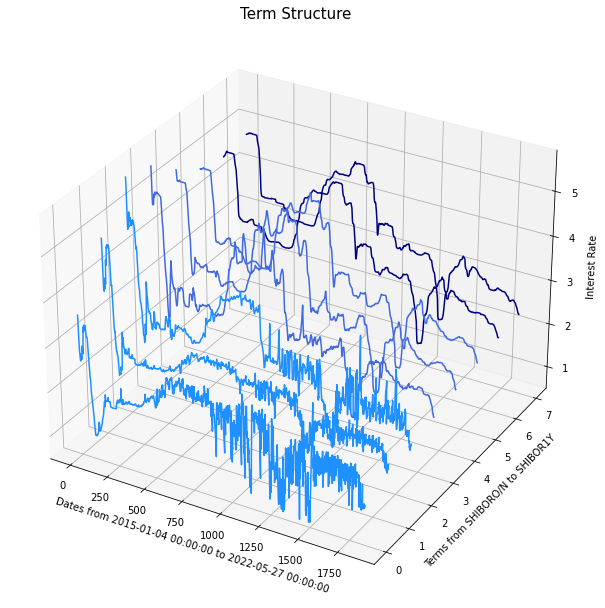

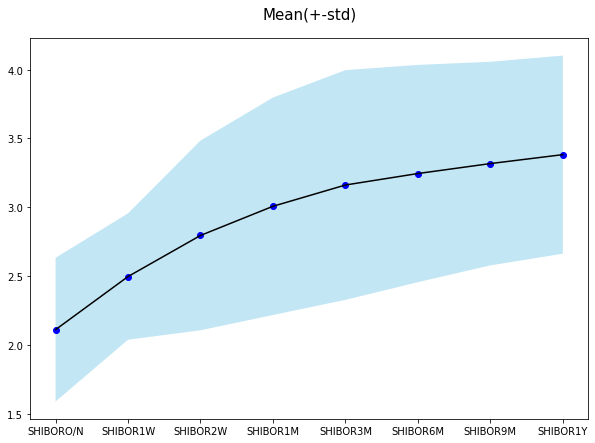

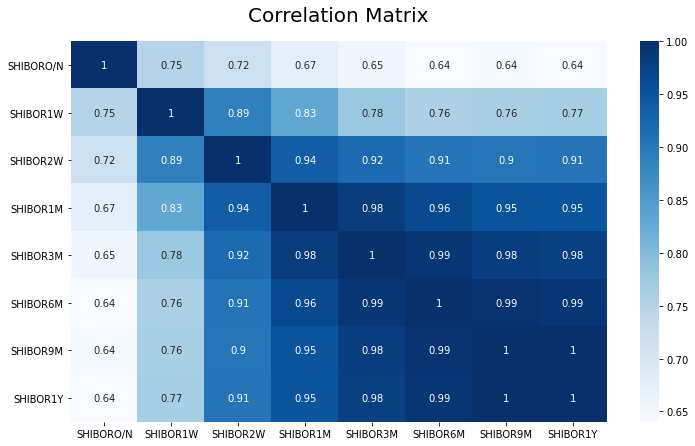

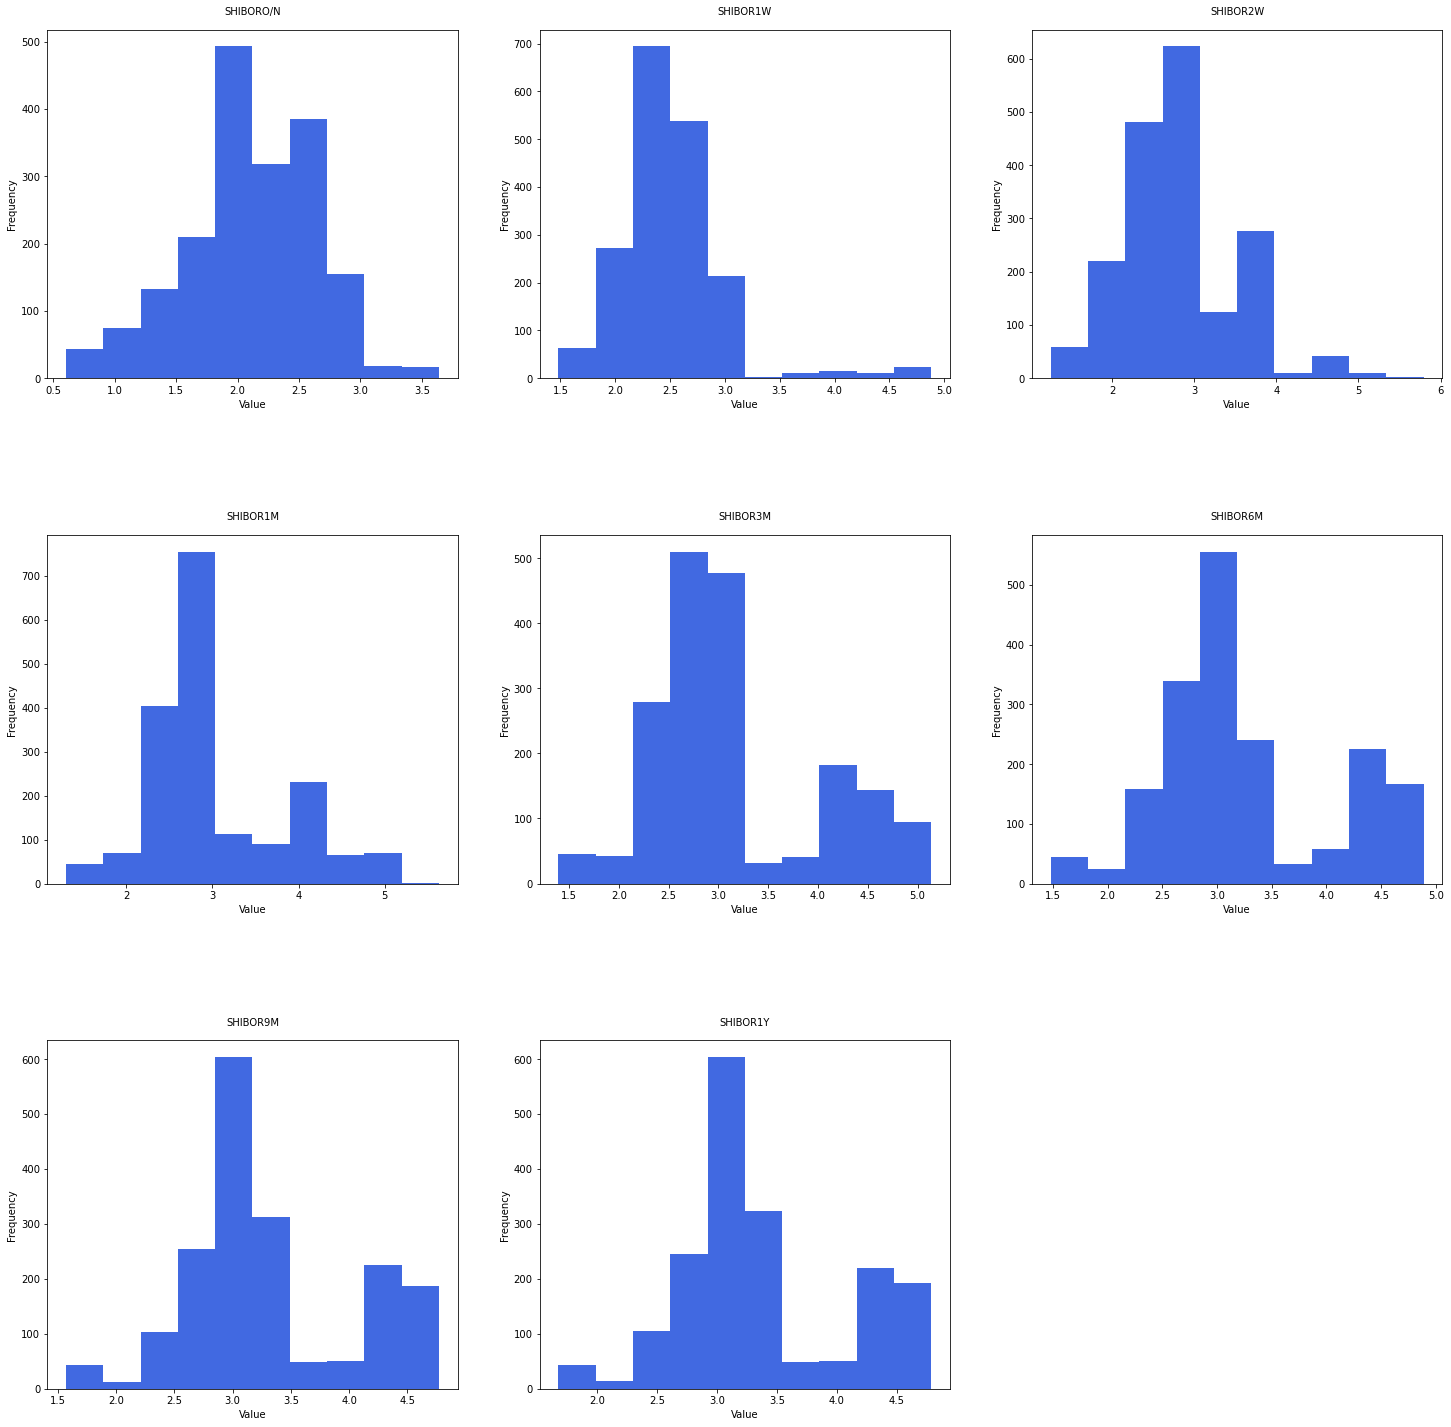

In [3]:
description,corr,cov,ts_p,ts_t=a.Description_Easy()

In [17]:
description

,1-month,3-month,6-month,1-yr,2-yr,3-yr,5-yr,7-yr,10-yr,20-yr,30-yr
count,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000
mean,0.551,0.586,0.660,0.748,0.959,1.176,1.630,2.018,2.369,2.881,3.146
std,0.777,0.793,0.806,0.804,0.744,0.687,0.601,0.577,0.588,0.675,0.659
min,0.000,0.000,0.020,0.080,0.160,0.240,0.340,0.480,0.540,0.870,0.990
25%,0.030,0.050,0.090,0.160,0.370,0.670,1.230,1.570,1.920,2.480,2.780
50%,0.120,0.140,0.190,0.300,0.690,1.000,1.610,2.030,2.330,2.770,3.030
75%,0.960,1.040,1.130,1.225,1.350,1.530,1.955,2.345,2.750,3.220,3.450
max,2.510,2.490,2.580,2.740,2.980,3.050,3.090,3.460,4.010,4.690,4.850


In [25]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(a.data.iloc[:,1], lags=3)

(array([1769.52190589, 3461.37086745, 5096.10142899]), array([0., 0., 0.]))

In [26]:
from statsmodels.tsa.stattools import adfuller
adfuller(a.data.iloc[:,1])

(-4.946884071931071,
 2.8241318142339068e-05,
 23,
 1822,
 {'1%': -3.4339441475744668,
  '5%': -2.8631276157416945,
  '10%': -2.5676151930364455},
 -4373.149424677678)

In [28]:
corr

,1-month,3-month,6-month,1-yr,2-yr,3-yr,5-yr,7-yr,10-yr,20-yr,30-yr
1-month,1.000,0.997,0.990,0.974,0.927,0.850,0.606,0.345,0.067,-0.214,-0.317
3-month,0.997,1.000,0.997,0.985,0.943,0.868,0.627,0.365,0.082,-0.207,-0.310
6-month,0.990,0.997,1.000,0.995,0.961,0.890,0.650,0.384,0.093,-0.206,-0.310
1-yr,0.974,0.985,0.995,1.000,0.981,0.921,0.694,0.431,0.132,-0.181,-0.286
2-yr,0.927,0.943,0.961,0.981,1.000,0.977,0.806,0.566,0.264,-0.071,-0.183
3-yr,0.850,0.868,0.890,0.921,0.977,1.000,0.908,0.711,0.421,0.078,-0.038
5-yr,0.606,0.627,0.650,0.694,0.806,0.908,1.000,0.937,0.743,0.450,0.341
7-yr,0.345,0.365,0.384,0.431,0.566,0.711,0.937,1.000,0.926,0.724,0.638
10-yr,0.067,0.082,0.093,0.132,0.264,0.421,0.743,0.926,1.000,0.929,0.879
20-yr,-0.214,-0.207,-0.206,-0.181,-0.071,0.078,0.450,0.724,0.929,1.000,0.990


In [29]:
cov

,1-month,3-month,6-month,1-yr,2-yr,3-yr,5-yr,7-yr,10-yr,20-yr,30-yr
1-month,1.000,0.998,0.991,0.975,0.928,0.850,0.606,0.345,0.067,-0.214,-0.317
3-month,0.998,1.000,0.997,0.985,0.944,0.869,0.628,0.365,0.082,-0.207,-0.310
6-month,0.991,0.997,1.000,0.995,0.961,0.890,0.651,0.385,0.093,-0.207,-0.310
1-yr,0.975,0.985,0.995,1.000,0.981,0.921,0.694,0.431,0.132,-0.181,-0.286
2-yr,0.928,0.944,0.961,0.981,1.000,0.978,0.806,0.567,0.264,-0.071,-0.183
3-yr,0.850,0.869,0.890,0.921,0.978,1.000,0.908,0.711,0.421,0.078,-0.038
5-yr,0.606,0.628,0.651,0.694,0.806,0.908,1.000,0.938,0.743,0.450,0.341
7-yr,0.345,0.365,0.385,0.431,0.567,0.711,0.938,1.000,0.926,0.724,0.638
10-yr,0.067,0.082,0.093,0.132,0.264,0.421,0.743,0.926,1.000,0.930,0.879
20-yr,-0.214,-0.207,-0.207,-0.181,-0.071,0.078,0.450,0.724,0.930,1.000,0.990


In [30]:
ts_p

,ADF,Lj-1,Lj-2,Lj-3,Lj-4,Lj-5
1-month,0.698,0.0,0.0,0.0,0.0,0.0
3-month,0.738,0.0,0.0,0.0,0.0,0.0
6-month,0.744,0.0,0.0,0.0,0.0,0.0
1-yr,0.706,0.0,0.0,0.0,0.0,0.0
2-yr,0.804,0.0,0.0,0.0,0.0,0.0
3-yr,0.686,0.0,0.0,0.0,0.0,0.0
5-yr,0.406,0.0,0.0,0.0,0.0,0.0
7-yr,0.316,0.0,0.0,0.0,0.0,0.0
10-yr,0.348,0.0,0.0,0.0,0.0,0.0
20-yr,0.543,0.0,0.0,0.0,0.0,0.0


In [31]:
ts_t

,ADF,Lj-1,Lj-2,Lj-3,Lj-4,Lj-5
1-month,-1.142,2578.292,5154.017,7727.411,10298.557,12866.815
3-month,-1.042,2579.710,5157.734,7733.817,10307.682,12878.917
6-month,-1.025,2579.890,5158.260,7734.749,10309.127,12881.115
1-yr,-1.123,2579.780,5158.064,7734.618,10308.980,12880.867
2-yr,-0.849,2576.349,5148.797,7717.317,10281.621,12841.231
3-yr,-1.170,2571.857,5135.341,7690.641,10237.502,12775.143
5-yr,-1.750,2559.033,5097.727,7616.408,10114.742,12591.641
7-yr,-1.934,2549.875,5070.763,7562.739,10026.065,12459.812
10-yr,-1.867,2548.019,5064.857,7550.216,10005.191,12429.368
20-yr,-1.481,2552.714,5078.838,7578.028,10051.970,12501.259


2. 主成分分析

图形为碎石图，因子载荷热力图，因子载荷时间序列图

数据为KMO-Bartlett检验结果，公因子方差解释，总方差解释，原始载荷矩阵，真实载荷矩阵

In [6]:
Variance_Explaination

,总计,方差百分比,累积%,总计,方差百分比,累积%
SHIBORO/N,3.645,0.918,0.918,3.645,0.918,0.918
SHIBOR1W,0.187,0.047,0.965,0.187,0.047,0.965
SHIBOR2W,0.076,0.019,0.985,0.076,0.019,0.985
SHIBOR1M,0.033,0.008,0.993,,,
SHIBOR3M,0.022,0.006,0.998,,,
SHIBOR6M,0.005,0.001,1.000,,,
SHIBOR9M,0.001,0.000,1.000,,,
SHIBOR1Y,0.000,0.000,1.000,,,


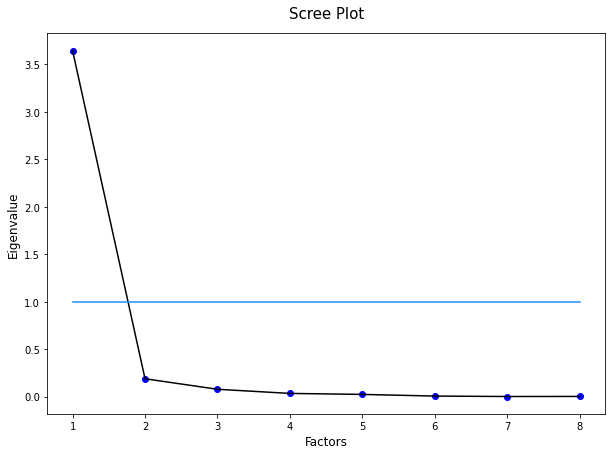

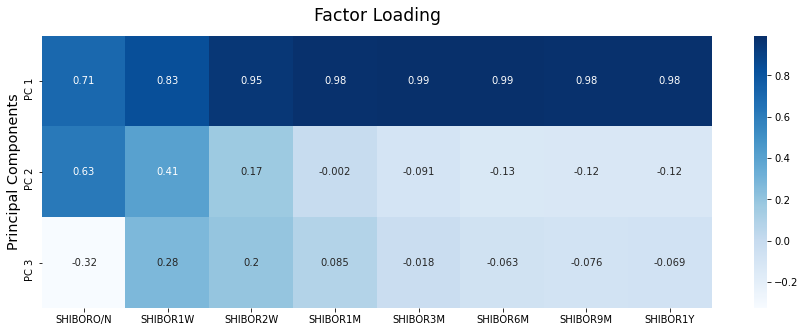

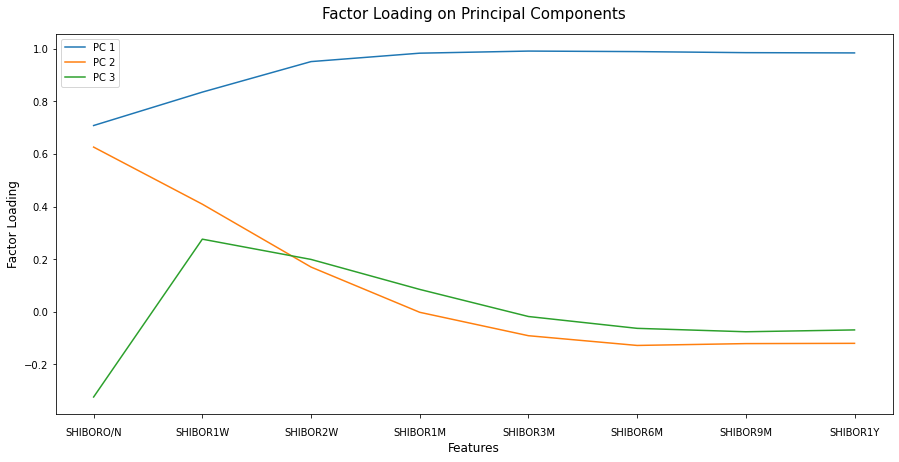

In [4]:
#参数是提取的主成分个数，注意一定不能是0，也不要超过变量个数
Test_result,Factor_Variance,Variance_Explaination,corr_prim,corr_reo=a.PCA_Easy(3)

In [45]:
a.show_data().head(5)

,1-month,3-month,6-month,1-yr,2-yr,3-yr,5-yr,7-yr,10-yr,20-yr,30-yr
2010-01-04,-0.644582,-0.638095,-0.596032,-0.370965,0.176133,0.704002,1.696416,2.326547,2.519272,2.545542,2.282929
2010-01-05,-0.670319,-0.650711,-0.608448,-0.420723,0.068625,0.573015,1.546760,2.187848,2.383187,2.456683,2.191874
2010-01-06,-0.670319,-0.663326,-0.633280,-0.433163,0.068625,0.616678,1.613273,2.274535,2.519272,2.589971,2.358808
2010-01-07,-0.683187,-0.675942,-0.620864,-0.433163,0.095502,0.645786,1.646530,2.274535,2.519272,2.575161,2.343633
2010-01-08,-0.683187,-0.675942,-0.633280,-0.470482,0.001433,0.558461,1.563388,2.239860,2.485251,2.560352,2.358808


In [34]:
Test_result

,0,1,2
0,KMO取样适切性量数,,0.822
1,巴特利特球形度检验,近似卡方,128639.023
2,,显著性,0.0


In [35]:
Factor_Variance

,初始,提取,调整后初始,调整后提取
1-month,1.0,1.000,1.0,1.000
3-month,1.0,1.000,1.0,1.000
6-month,1.0,1.000,1.0,1.000
1-yr,1.0,1.000,1.0,1.000
2-yr,1.0,1.000,1.0,1.000
3-yr,1.0,1.000,1.0,1.000
5-yr,1.0,1.000,1.0,0.999
7-yr,1.0,1.000,1.0,1.000
10-yr,1.0,0.999,1.0,0.999
20-yr,1.0,0.999,1.0,0.999


In [36]:
Variance_Explaination

,总计,方差百分比,累积%,总计,方差百分比,累积%
1-month,6.811,0.619,0.619,6.811,0.619,0.619
3-month,3.859,0.351,0.970,3.859,0.351,0.97
6-month,0.296,0.027,0.996,0.296,0.027,0.996
1-yr,0.029,0.003,0.999,0.029,0.003,0.999
2-yr,0.004,0.000,0.999,0.004,0.0,0.999
3-yr,0.003,0.000,1.000,,,
5-yr,0.001,0.000,1.000,,,
7-yr,0.001,0.000,1.000,,,
10-yr,0.001,0.000,1.000,,,
20-yr,0.000,0.000,1.000,,,


In [37]:
corr_prim

,1-month,3-month,6-month,1-yr,2-yr,3-yr,5-yr,7-yr,10-yr,20-yr,30-yr
PC 1,0.915,0.928,0.940,0.956,0.984,0.983,0.870,0.673,0.403,0.081,-0.034
PC 2,0.334,0.323,0.314,0.277,0.142,-0.032,-0.433,-0.718,-0.915,-0.978,-0.975
PC 3,0.207,0.180,0.131,0.064,-0.067,-0.176,-0.232,-0.169,0.014,0.189,0.212
PC 4,0.083,0.042,-0.011,-0.067,-0.083,-0.035,0.040,0.053,0.015,-0.010,-0.052
PC 5,0.028,-0.007,-0.024,-0.026,0.015,0.031,0.002,-0.019,-0.015,0.011,0.010


In [54]:
a.show_data()

,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,SHIBOR3M,SHIBOR6M,SHIBOR9M,SHIBOR1Y
2015-01-04,3.640,4.883,5.794,5.629,5.138,4.7537,4.6246,4.7385
2015-01-05,3.421,4.725,5.665,5.364,5.125,4.7478,4.6276,4.7429
2015-01-06,3.032,4.241,4.965,5.102,5.077,4.7482,4.6410,4.7455
2015-01-07,2.881,3.873,4.732,4.953,5.019,4.7501,4.6457,4.7476
2015-01-08,2.830,3.745,4.659,4.803,4.963,4.7480,4.6487,4.7488
...,...,...,...,...,...,...,...,...
2022-05-23,1.323,1.693,1.704,1.900,2.021,2.1670,2.2540,2.3310
2022-05-24,1.325,1.681,1.691,1.897,2.013,2.1510,2.2420,2.3230
2022-05-25,1.347,1.785,1.737,1.871,2.009,2.1430,2.2430,2.3260
2022-05-26,1.364,1.765,1.737,1.875,1.990,2.1360,2.2430,2.3250


3. 进一步探索

图形为选择的主成分、原始数据的图，二者的散点图

数据为生成的主成分

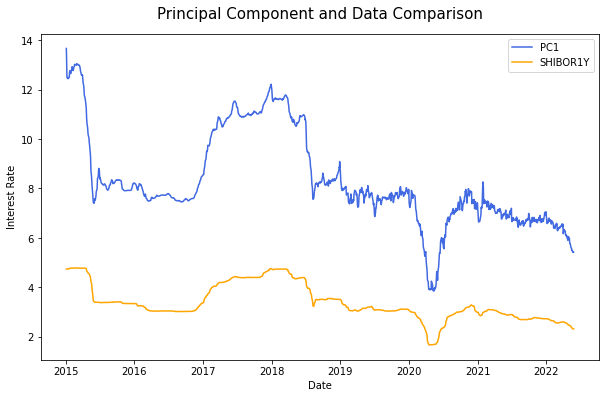

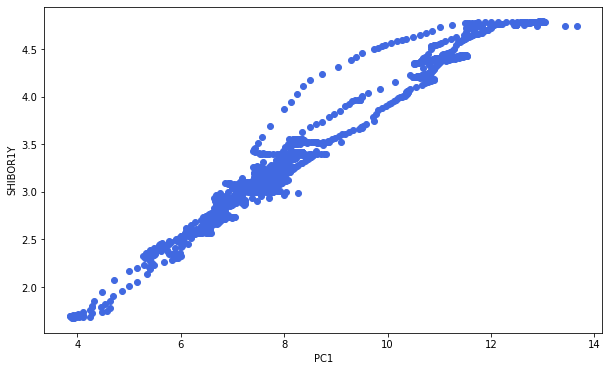

In [7]:
#参数diff，如果只想探究一个，就放一个标题进去，如果想探究两个的差，就放两个进去，顺序是第一个元素-第二个元素
#参数pc_name是主成分的名字，不要超过自己提取的主成分
Comp=a.Components(diff=['SHIBOR1Y'],pc_name='PC1')

In [22]:
Comp

,PC1,PC2,PC3,PC4,PC5
2010-01-04,2.343153,-8.610931,0.473556,-0.366399,0.200352
2010-01-05,2.214577,-8.455075,0.526991,-0.350680,0.174184
2010-01-06,2.222863,-8.630583,0.547843,-0.354149,0.194117
2010-01-07,2.239252,-8.629257,0.515733,-0.364094,0.198280
2010-01-08,2.158575,-8.594815,0.576157,-0.336719,0.176302
...,...,...,...,...,...
2020-04-17,0.501968,-1.774925,0.525090,-0.240761,0.114668
2020-04-20,0.482493,-1.718407,0.496188,-0.241461,0.112599
2020-04-21,0.462504,-1.620684,0.462229,-0.254380,0.095558
2020-04-22,0.493614,-1.718939,0.468425,-0.246256,0.107581


# （四）高级操作

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
a=[51.5,37,73.5,90,49,52,83,64,89,89,71,50,40,43,74,53,68.5,76,48.5,75,56,36,51,42,35,87,72,58,71]

In [3]:
a=np.array(a)

(array([4., 2., 4., 4., 1., 1., 4., 4., 1., 4.]),
 array([35. , 40.5, 46. , 51.5, 57. , 62.5, 68. , 73.5, 79. , 84.5, 90. ]),
 <BarContainer object of 10 artists>)

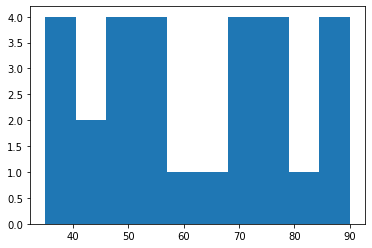

In [14]:
plt.hist(a,bins=10)

<AxesSubplot:ylabel='Density'>

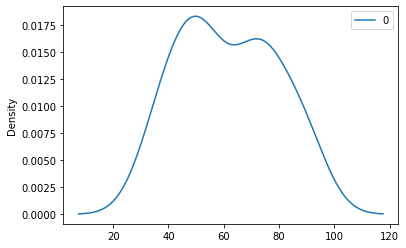

In [15]:
import pandas as pd
a=pd.DataFrame(a)
a.plot(kind='kde')

In [16]:
a.describe()

,0
count,29.000000
mean,61.551724
std,17.409124
min,35.000000
25%,49.000000
50%,58.000000
75%,74.000000
max,90.000000
